### The second Jupyter Notebook (CSV file)

### 1.  Import Key Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

### 2. Load Data 

#### The dataset utilized for this analysis is sourced from the National Solar Radiation Database (NSRDB)  at the following link:  [National Solar Radiation Database](https://nsrdb.nrel.gov/).
#### The dataset is a collection of hourly values of meteorological data and the three most common measurements of solar radiation: global horizontal irradiance (GHI), direct normal irradiance(DNI) and diffuse horizontal irradiance(DHI).

In [2]:
# read the file into DataFrame
df= pd.read_csv("HAL2018.csv")
df

,Year,Month,Day,Hour,Minute,DHI,DNI,GHI,Clearsky GHI,Cloud Type,Dew Point,Solar Zenith Angle,Surface Albedo,Wind Speed,Precipitable Water,Wind Direction,Relative Humidity,Temperature,Pressure,Unnamed: 19
0,2018,1,1,0,30,0,0,0,0,4,-11.5,158.21,0.13,4.2,0.3,294,91.45,-10.4,1009,NaN
1,2018,1,1,1,30,0,0,0,0,4,-11.5,153.77,0.13,4.1,0.3,293,92.36,-10.5,1009,NaN
2,2018,1,1,2,30,0,0,0,0,4,-11.4,145.39,0.13,4.0,0.3,293,92.78,-10.5,1010,NaN
3,2018,1,1,3,30,0,0,0,0,4,-11.4,135.38,0.13,4.0,0.3,293,93.62,-10.6,1010,NaN
4,2018,1,1,4,30,0,0,0,0,4,-11.4,124.80,0.13,3.9,0.3,294,94.35,-10.7,1011,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8755,2018,12,31,19,30,0,0,0,0,0,-8.1,118.65,0.13,2.1,0.7,228,76.30,-4.6,1026,NaN
8756,2018,12,31,20,30,0,0,0,0,4,-11.3,129.27,0.13,4.9,0.3,293,88.45,-9.7,1008,NaN
8757,2018,12,31,21,30,0,0,0,0,4,-11.6,139.69,0.13,4.8,0.3,295,88.30,-10.0,1008,NaN
8758,2018,12,31,22,30,0,0,0,0,4,-11.7,149.20,0.13,4.6,0.3,295,88.96,-10.2,1009,NaN


In [3]:
#  provides a summary of the DataFrame
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 20 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Year                8760 non-null   int64  
 1   Month               8760 non-null   int64  
 2   Day                 8760 non-null   int64  
 3   Hour                8760 non-null   int64  
 4   Minute              8760 non-null   int64  
 5   DHI                 8760 non-null   int64  
 6   DNI                 8760 non-null   int64  
 7   GHI                 8760 non-null   int64  
 8   Clearsky GHI        8760 non-null   int64  
 9   Cloud Type          8760 non-null   int64  
 10  Dew Point           8760 non-null   float64
 11  Solar Zenith Angle  8760 non-null   float64
 12  Surface Albedo      8760 non-null   float64
 13  Wind Speed          8760 non-null   float64
 14  Precipitable Water  8760 non-null   float64
 15  Wind Direction      8760 non-null   int64  
 16  Relati

In [4]:
# Check for missing values
print(df.isnull().sum())

Year                     0
Month                    0
Day                      0
Hour                     0
Minute                   0
DHI                      0
DNI                      0
GHI                      0
Clearsky GHI             0
Cloud Type               0
Dew Point                0
Solar Zenith Angle       0
Surface Albedo           0
Wind Speed               0
Precipitable Water       0
Wind Direction           0
Relative Humidity        0
Temperature              0
Pressure                 0
Unnamed: 19           8760
dtype: int64


### 2. Plot some Data

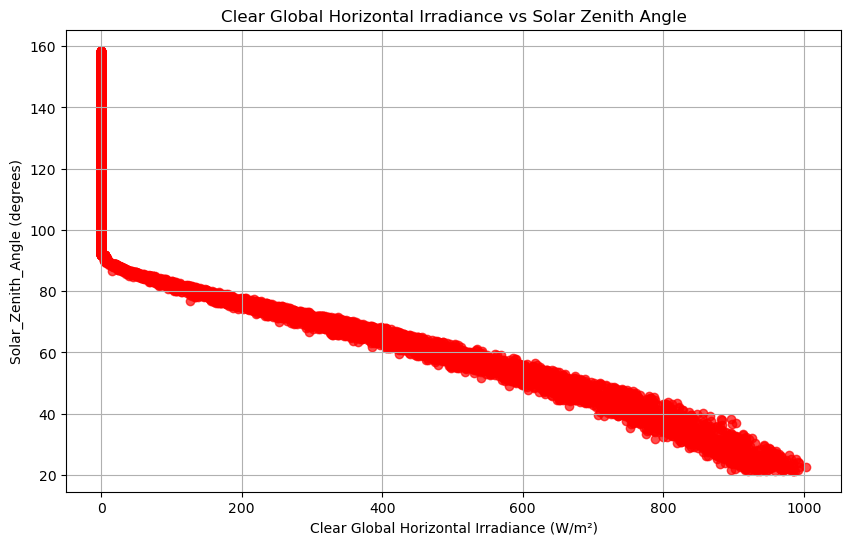

In [5]:
#  Scatter plot to visualize the relationship between Clear GHI and the Solar Zenith Angle.
plt.figure(figsize=(10, 6))
plt.scatter(df['Clearsky GHI'], df['Solar Zenith Angle'], color='red', alpha=0.7)
plt.title('Clear Global Horizontal Irradiance vs Solar Zenith Angle')
plt.ylabel('Solar_Zenith_Angle (degrees)')
plt.xlabel('Clear Global Horizontal Irradiance (W/m²)')
plt.grid(True)
plt.show()

##### Measuring correlation coefficient between Clear GHI and the Solar Zenith Angle for a better understanding of shown in the plot.

In [6]:
# A correlation coefficient of -0.88 between Clear GHI and the Solar Zenith Angle indicates a very strong negative correlation between the two variables.
correlation = df['Clearsky GHI'].corr(df['Solar Zenith Angle'])
print(f"Clear GHI and the Solar Zenith Angle: {correlation:.2f}")

Clear GHI and the Solar Zenith Angle: -0.88


#### Daily trends in two different seasons.It shows difference in the irradiance values in the both days. 

In [7]:
# Combine Year, Month, Day, and Hour to create a datetime column
df['Datetime'] = pd.to_datetime(df[['Year', 'Month', 'Day', 'Hour']])
#print(df['Datetime'])
# Set the Datetime as the index
df.set_index('Datetime', inplace=True)
X1= df.index[0:24] # select the day of (2018-01-02) (Time) winter Season
Y1= df['GHI'][0:24] # select the corresponding GHI data (GHI data ) for that day 
X2 = df.index[4346:4369]  # select the day of (2018-01-02) (Time) winter Season
Y2 = df['GHI'][4346:4369]
print(X1,X2) # check the selected time 

DatetimeIndex(['2018-01-01 00:00:00', '2018-01-01 01:00:00',
               '2018-01-01 02:00:00', '2018-01-01 03:00:00',
               '2018-01-01 04:00:00', '2018-01-01 05:00:00',
               '2018-01-01 06:00:00', '2018-01-01 07:00:00',
               '2018-01-01 08:00:00', '2018-01-01 09:00:00',
               '2018-01-01 10:00:00', '2018-01-01 11:00:00',
               '2018-01-01 12:00:00', '2018-01-01 13:00:00',
               '2018-01-01 14:00:00', '2018-01-01 15:00:00',
               '2018-01-01 16:00:00', '2018-01-01 17:00:00',
               '2018-01-01 18:00:00', '2018-01-01 19:00:00',
               '2018-01-01 20:00:00', '2018-01-01 21:00:00',
               '2018-01-01 22:00:00', '2018-01-01 23:00:00'],
              dtype='datetime64[ns]', name='Datetime', freq=None) DatetimeIndex(['2018-07-01 02:00:00', '2018-07-01 03:00:00',
               '2018-07-01 04:00:00', '2018-07-01 05:00:00',
               '2018-07-01 06:00:00', '2018-07-01 07:00:00',
               '20

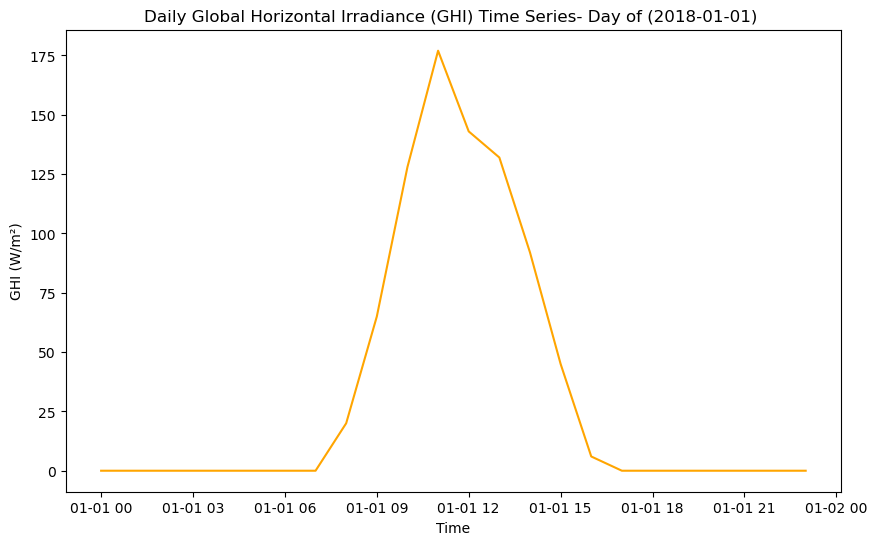

In [8]:
# Plot Global Horizontal Irradiance (GHI) for the day of (2018-01-01) 
plt.figure(figsize=(10, 6))
plt.plot(X1, Y1, color='orange', linestyle='-')
plt.title('Daily Global Horizontal Irradiance (GHI) Time Series- Day of (2018-01-01) ')
plt.xlabel('Time')
plt.ylabel('GHI (W/m²)')
plt.show()

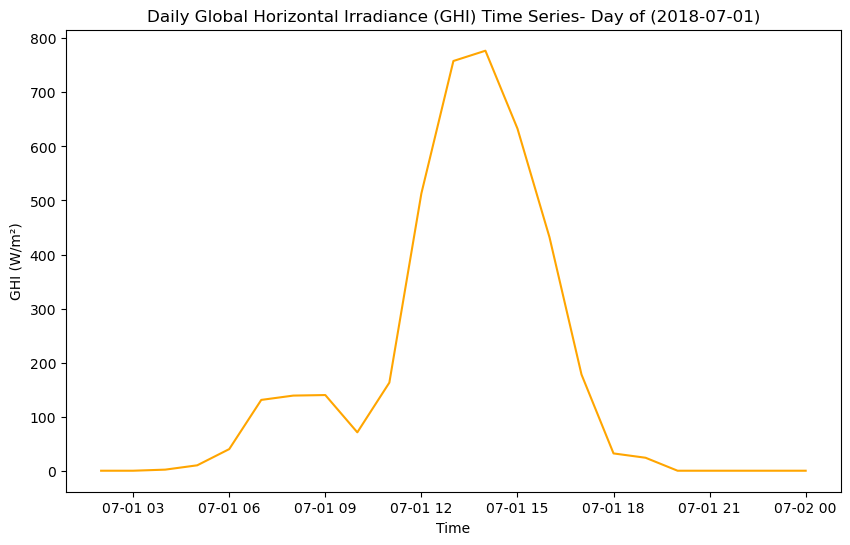

In [9]:
# Plot Global Horizontal Irradiance (GHI) for the day of (2018-07-01) 
plt.figure(figsize=(10, 6))
plt.plot(X2, Y2, color='orange', linestyle='-')
plt.title('Daily Global Horizontal Irradiance (GHI) Time Series- Day of (2018-07-01)')
plt.xlabel('Time')
plt.ylabel('GHI (W/m²)')
plt.show()